# K-means 範例

- 範例目標：讓同學了解如何使用 sklearn 執行 k-means
- 範例重點：設定 模型估計參數 以及 資料建模 兩大區塊

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [ ]:
!pip3 install --user sklearn
!pip3 install --user --upgrade matplotlib

載入套件

In [45]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

載入 toy example 資料集

In [46]:
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0]
y = toy[1]
#print(toy)


設定 模型 估計參數

In [47]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

In [48]:
#X[:, 2]
#toy[0:1]
#X.to_csv('toy.csv',index=False)

資料建模 並 視覺化 結果

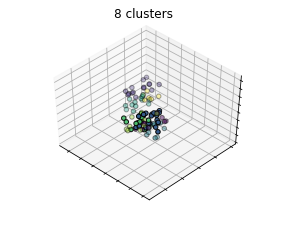

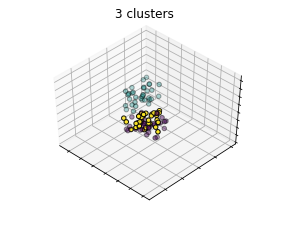

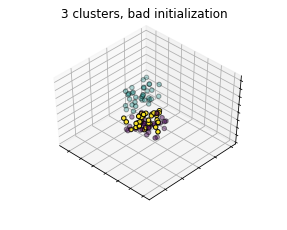

In [49]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
   # print('name:',name)
   # print('est:',est)
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
     
    ##fig : Figure
    ##The parent figure.

    ##rect : (float, float, float, float)
    ##The (left, bottom, width, height) axes position.

    ##azim : float, optional
    ##Azimuthal viewing angle, defaults to -60.

    ##elev : float, optional
    ##Elevation viewing angle, defaults to 30.

    ##zscale : ['function' | 'functionlog' | 'linear' | 'log' | 'logit' | 'symlog'], optional
    ##The z scale. Note that currently, only a linear scale is supported.

    ##sharez : Axes3D, optional
    ##Other axes to share z-limits with.

    ##proj_type : {'persp', 'ortho'}
    ##The projection type, default 'persp'.
    
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([]) # 設定X標籤
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

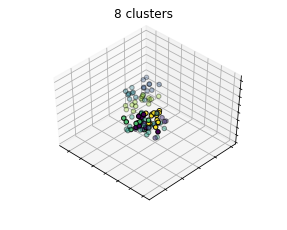

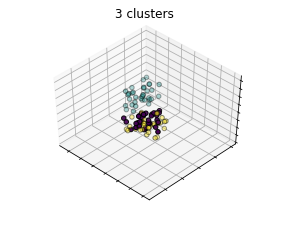

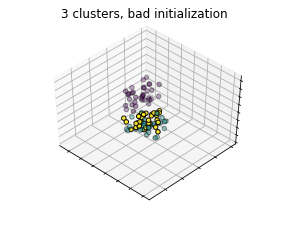

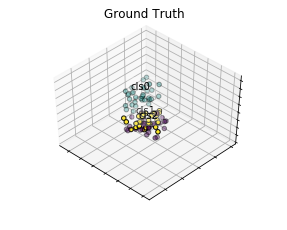

In [50]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0), #cluster 0
                    ('cls1', 1), # cluster 1 
                    ('cls2', 2)]: # cluster 2
    #print(name)
    #print(label)
    
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
    
    #Text3D(x=0, y=0, z=0, text='', zdir='z', **kwargs)
    #x, y, z
    #The position of the text.

    #text : str
    #The text string to display.

    #zdir : {'x', 'y', 'z', None, 3-tuple}
    #The direction of the text. See get_dir_vector for a description of the values.
    
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()